<a href="https://colab.research.google.com/github/soyudea/Laboratorios_IA/blob/main/Copia_de_LAB_07_01_OPTIMIZATION_FOR_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 07.01 - Optimization for ML

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()


In [ ]:
from local.lib.rlxmoocapi import submit, session
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L07.01", varname="student");

logging in as omara.torres@udea.edu.co ... please wait
using course session ai4eng.v1.udea.r2::2023.1
success!! you are logged in


In [ ]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from local.lib import mlutils
%matplotlib inline

## Dataset 

you have data in a matrix $\mathbf{X} \in \mathbb{R}^{m\times n}$ and the corresponding labels $\mathbf{y} \in \mathbb{R}^m$.

each row in matrix $\mathbf{X}$ contains one data point $\mathbf{x}^{(i)}$

$$\begin{bmatrix}
 x^{(0)}\\
 x^{(1)}\\
 ... \\
 x^{(m-1)} 
\end{bmatrix}
$$

and each data point is a vector $\mathbf{x}^{(i)}=[x^{(i)}_0, x^{(i)}_1,...,x^{(i)}_{n-1}]$.

Also, each data point has an associated label $\mathbf{y} = [y^{(0)}, y^{(1)},..., y^{(m-1)}]$.

We will be doing **binary classification** so $y^{(0)}\in \{0,1\}$

In [ ]:

d = pd.read_csv("local/data/moons.csv")
X = d[["col1", "col2"]].values
y = d["target"].values
print ("m=%d\nn=%d"%(X.shape[0], X.shape[1]))
X.shape, y.shape


m=200
n=2


((200, 2), (200,))

In [ ]:

print (X[:10])
print (y[:10])


[[ 1.303374   -0.81478084]
 [-0.98727894 -0.06456482]
 [ 2.317555    0.44925394]
 [ 0.85310268 -0.22083508]
 [-0.97006406  0.64095693]
 [ 1.65849049 -0.2342485 ]
 [ 0.8684624  -0.28940167]
 [ 0.05631143  0.00296565]
 [ 0.88824669 -0.12888889]
 [ 0.9925954   0.31451716]]
[1 0 1 1 0 1 1 1 1 0]


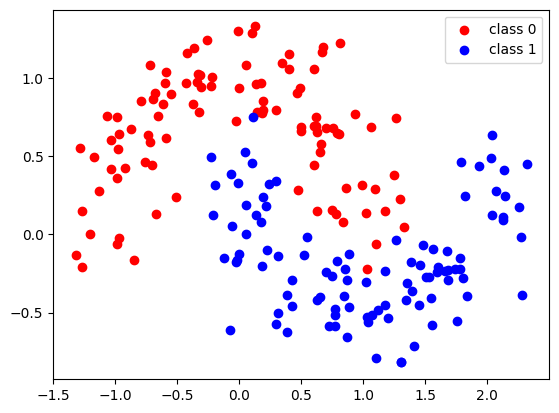

In [ ]:

plt.scatter(X[:,0][y==0], X[:,1][y==0], color="red", label="class 0")
plt.scatter(X[:,0][y==1], X[:,1][y==1], color="blue", label="class 1")
plt.legend();


## Task 1: Create a prediction function

**complete the following prediction function** which accepts:
    
- $\mathbf{\theta} = [\theta_0, \theta_1,... \theta_{n-1}] \in \mathbb{R}^n$, a `numpy` vector.
- $b  \in \mathbb{R}$ , a `float`.
- $\mathbf{X} \in \mathbb{R}^{m\times n}$, a `numpy` 2D array.

and returns

- $\hat{\mathbf{y}} = [\hat{y}^{(0)}, \hat{y}^{(1)}, ..., \hat{y}^{(m-1)}] \in \mathbb{R}^m$ defined as follows

$$\hat{y}^{(i)} = \text{sigm}(\mathbf{\theta} \cdot \mathbf{x}^{(i)} + b) = \text{sigm}(\theta_0 x^{(i)}_0 + \theta_1 x^{(i)}_1 + b)$$

with 

$$\text{sigm}(z) = \frac{1}{1+e^{-z}}$$

note that we can also express the prediction vector $\hat{\mathbf{y}}$ over the whole dataset as

$$\hat{\mathbf{y}} = \text{sigm}(\mathbf{\theta} \cdot \mathbf{X} + b)$$

observe that for any $z$, the sigmoid function squeshes its value between 0 and 1. It can  be simply seen as a continuous **step** function which converts any negative value into 0, and any positive value into 1.

**challenge**: use only one line of python code (not counting the $\text{sigm}$ definition)

**warn**: your function must work with any $\mathbf{X} \in \mathbb{R}^{m\times n}$ and  $\mathbf{\theta} \in \mathbb{R}^n$, for any $m$ and $n$, not only for $n=2$

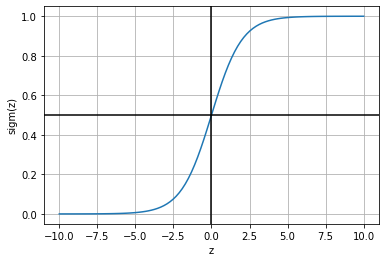

In [ ]:

z = np.linspace(-10,10,100)
sigm = lambda x: 1/(1+np.exp(-x))
plt.plot(z, sigm(z)); plt.grid(); plt.xlabel("z"); plt.ylabel("sigm(z)")
plt.axhline(0.5, color="black"); plt.axvline(0, color="black")


In [ ]:
def prediction(t,b,X):
    sigm = lambda z: 1/(1+np.exp(-z))    
    yhat = sigm(np.dot(X,t)+b)
    return yhat 

check manually your code. The following should yield a vector with 200 elements, whose sum should be 99.97 at its four first elements 

    [0.02328672 0.91257015 0.03781132 0.16139629 ... ]

In [ ]:
t,b = np.r_[[-2,2]], 0.5
yhat = prediction(t,b,X)
print (yhat)
print (np.sum(yhat))
print (yhat)

**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_01");

## Task 2: Create the loss function

accepting the following paramters

- $\mathbf{\theta} = [\theta_0, \theta_1] \in \mathbb{R}^n$, a `numpy` vector.
- $b  \in \mathbb{R}$ , a `float`.
- $\mathbf{X} \in \mathbb{R}^{m\times n}$, a `numpy` 2D array.
- $\mathbf{y} \in \mathbb{R}^m$, a `numpy` vector.


$$\text{loss}(\theta, b, \mathbf{X} , \mathbf{y}) = \frac{1}{m}\sum_{i=0}^{m-1}(\hat{y}^{(i)}-y^{(i)})^2$$

**challenge**: use only one line of python (not counting the `sigm` and `prediction` functions).

In [ ]:
def loss(t,b,X,y):
    sigm = lambda z: 1/(1+np.exp(-z))  
    yhat = sigm(np.dot(X,t)+b)      
    result =np.sum((yhat-y)**2)/len(y) 
    return result

check manually your code, you should get a loss of 0.664 approx.

In [ ]:
t,b = np.r_[[-2,2]], 0.5
loss(t,b,X,y)

0.6640737783637011

**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_02");

## Task 3: Obtain the best $\theta$ and $b$ with black box optimization

Complete the following function so that it returns the best $\theta$ and $b$ for a given data set.

Observe that 

- `x0` in `scipy.optimize.minimize` must be a vector of three items, the first two corresponding to $\theta_0$ and $\theta_1$, and the last one to $b$. 
- the return value of the optimizer `r.x` will also contain three items, and you will have to separate the first two into `t` and the last one into `b`. 
- you will have to adapt your `loss` function created before so that it extracts $\theta$ and $b$ from the variable `params`.

In [ ]:
def fit(X,y):
    from scipy.optimize import minimize
    
    def loss(params):
        t = ... # extract t from params
        b = ... # extract b params
        sigm = lambda z: 1/(1+np.exp(-z)) 
        yhat = sigm(np.dot(X,t)+b)    
        result =np.sum((yhat-y)**2)/len(y)         
        return result
    
    tinit = np.zeros(shape=X.shape[1]+1) # keep this initialization
    r = minimize(...) # complete the call to minimize
    t = ... # extract t from r.x
    b = ... # extract b from r.x
    return t, b

In [ ]:
t, b = fit(X,y)

check manually your code, you should get an accuracy of about 84%-87%, and a classification frontier similar to this one.

**Observe** how we convert the sigmoid output which can be any number $\in [0,1]$, into a discrete classification (0 or 1) by thresholding on 0.5

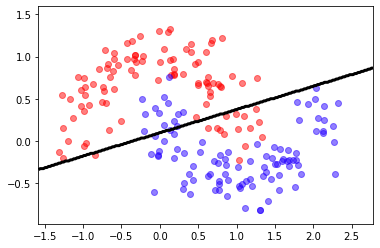

In [ ]:

from IPython.display import Image
Image(filename='local/imgs/logregmoons.png')


In [ ]:
t, b

In [ ]:
mlutils.plot_2Ddata_with_boundary(lambda X: prediction(t,b,X)>.5, X, y)

In [ ]:
acc = np.mean( (prediction(t,b,X)>.5)==y)
print ("accuracy %.3f"%acc)

**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_03");